In [1]:
import math, sys, functools, os, glob, sqlite3
import numpy as np
import numpy.random as rd
from numpy import matrix
import pandas as pd
import scipy as sp
from scipy import stats as st
from datetime import  datetime as dt
from collections import Counter
from itertools import chain
import multiprocessing as mp

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation as ani
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
%matplotlib inline

import  pickle
def unpickle(filename):
    with open(filename, 'rb') as fo:
        p = pickle.load(fo)
    return p

def to_pickle(filename, obj):
    with open(filename, 'wb') as f:
        pickle.dump(obj, f, -1)

from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

cm = generate_cmap(['lightblue', 'mediumblue', 'mediumblue','black', 'red', 'red', 'orangered'])


pd.options.display.max_rows = 71

import matplotlib.font_manager as fm
#fm.findSystemFonts()
plt.rcParams['font.family'] = 'Osaka'


In [2]:

def sigmoid(x, a=1, b=0):
    return 1 / (1 + np.exp(-a*x+b))


In [3]:
# データを生成
rs = 72
xn = st.norm.rvs(size=20, loc=0, scale=1, random_state=rs)
xp = xn
#xp = st.norm.rvs(size=20, loc=2.3, scale=1, random_state=rs)

# 図3-1

In [ ]:

# Fixed parameter

xmin, xmax = -4, 2
a, b = 3, -.5
thresh_range = np.linspace(xmin, xmax, 201)
y = sigmoid(thresh_range, a=a,b=b)

tpr_list = []
fpr_list = []
f_val_list = []
f_val_list2 = []

num_frame = 101
xxx = np.linspace(xmin, xmax, num_frame)[::-1]

for i, thresh in enumerate(xxx):
    col_n = list(map(lambda x: "b" if x<= thresh else "r", xn))
    col_p = list(map(lambda x: "b" if x>= thresh else "r", xp))
    
    tpr = col_p.count("b") / len(xp)
    fpr = col_n.count("r") / len(xn)
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    
    p = sigmoid(thresh, a=a,b=b)

    # Graph Drawing
    plt.figure(figsize=(14,10))
    
    plt.subplot(221) #==============================================================================
    plt.plot([thresh,thresh], [-0.2, 1.2], "k", lw=1)
    plt.plot([xmin, xmax], [p, p], "k--", lw=.5)
    plt.plot(thresh_range, y, color="g", lw=2) # sigmoid curve
    plt.scatter(xn, [0]*len(xn), marker="o", color=col_n, s=50, zorder=100)
    plt.scatter(xp, [1]*len(xp), marker="x", color=col_p, s=50, zorder=100, linewidth=2)
    
    plt.text(2, .98, "真陽性", size=12)
    plt.text(2, -.02, "真陰性", size=12)
    
    if thresh >= -2:
        plt.text(thresh-1, .78, "陰性と判断←", size=12 )
    
    plt.text(thresh+.1, .18, "→陽性と判断", size=12 )
    
    plt.title("threshold:{0:.3f}, p:{1:.3f}, tpr:{2:.3f}, fpr:{3:.3f}".format(thresh, p, tpr, fpr))

    plt.ylim(-0.2, 1.2)
    plt.xlim(xmin, xmax)
    
    # 凡例用
    plt.scatter([-10],[-10], marker="o", color="r",  s=50, label="False Negative")
    plt.scatter([-10],[-10], marker="o", color="b",  s=50, label="True Positive")
    
    plt.scatter([-10],[-10], marker="x", color="r",  s=50, linewidth=2, label="False Positive")
    plt.scatter([-10],[-10], marker="x", color="b",  s=50, linewidth=2, label="True Negative")
    
    plt.legend(loc="upper left", )
    
    
    plt.subplot(224) #==============================================================================
    plt.plot(fpr_list, tpr_list)
    plt.scatter(fpr_list, tpr_list)
    plt.plot([0,1],[0,1], "k--", lw=1)
    
    plt.xlim(-.01,1.01)
    plt.ylim(-.01,1.01)
    
    plt.ylabel("←悪い     tpr       良い→")
    plt.xlabel("←良い     fpr       悪い→")
    plt.title("ROC curve. tpr:{0:.3f}, fpr:{1:.3f}".format(tpr, fpr))
    
    plt.subplot(223) #==============================================================================
    
    if col_p.count("b")+col_n.count("r") != 0:
        precision = col_p.count("b")/(col_p.count("b")+col_n.count("r"))
    else:
        precision = 0
        
    recall = tpr
    
    if precision+recall != 0:
        f_value = 2 / (1/precision + 1/recall)
    else:
        f_value = 0
    
    f_val_list.append(f_value)
    
    plt.plot(xxx[:len(f_val_list)], f_val_list)
    plt.scatter(xxx[:len(f_val_list)], f_val_list)
    plt.title("f-value{0:.3f},  precision:{1:.3f}, recall:{2:.3f}".format(f_value, precision, recall))
    plt.ylim(-0.2, 1.2)
    plt.xlim(xmin, xmax)
    
    
    plt.subplot(222) #==============================================================================
    # tpr fprで表した　F値
    if tpr!=0 and (1-fpr)!=0 and (1/tpr + 1/(1-fpr))!=0:
        f_value2 = 2 / (1/tpr + 1/(1-fpr))
    else:
        f_value2 = 0
    
    f_val_list2.append(f_value2)
    
    plt.plot(xxx[:len(f_val_list2)], f_val_list2)
    plt.scatter(xxx[:len(f_val_list2)], f_val_list2)
    plt.title("f-value:{0:.3f},  tpr:{1:.3f}, (1-fpr):{2:.3f}".format(f_value2, tpr, (1-fpr)))
    plt.ylim(-0.2, 1.2)
    plt.xlim(-3, 5)    
    
    
    plt.tight_layout()
    plt.savefig("./img/ROC_rd_{0:02d}".format(i+1), dpi=128)
    #plt.show()

# 図3-2

51
0%, 0%, 1%, 3%, 5%, 7%, 9%, 11%, 13%, 15%, 17%, 19%, 21%, 23%, 25%, 27%, 29%, 31%, 33%, 35%, 37%, 39%, 41%, 43%, 45%, 47%, 49%, 50%, 52%, 54%, 56%, 58%, 60%, 62%, 64%, 66%, 68%, 70%, 72%, 74%, 76%, 78%, 80%, 82%, 84%, 86%, 88%, 90%, 92%, 94%, 96%, 98%, fin
0%, 

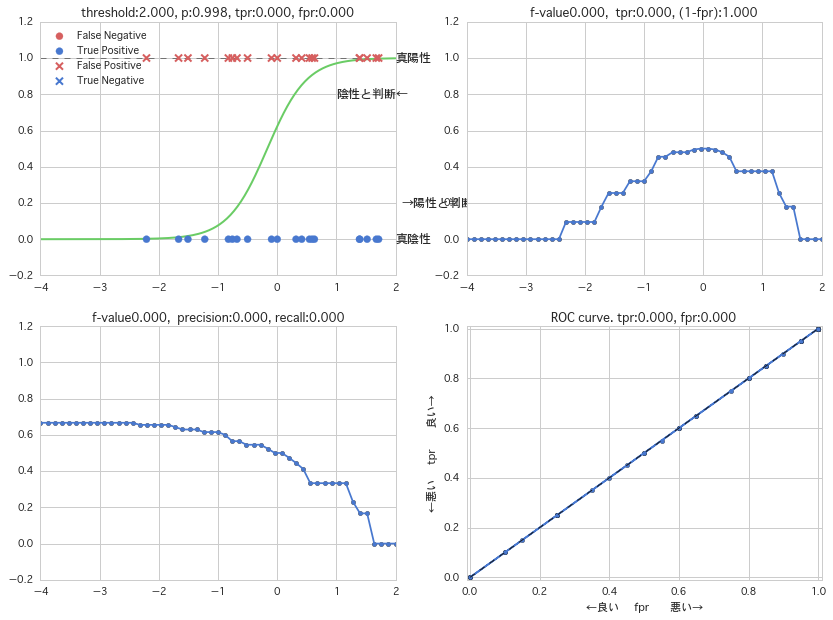

In [19]:

# Fixed parameter
xmin, xmax = -4, 2
a, b = 3, -.5
thresh_range = np.linspace(xmin, xmax, 201)
y = sigmoid(thresh_range, a=a,b=b)

def animate(nframe):
    global num_frame, tpr_list, fpr_list, thresh_range, f_val_list, f_val_list2
    sys.stdout.write(str(int(float(nframe)/num_frame*100)) + "%, ") 
    
    thresh = np.linspace(xmin, xmax, num_frame)[::-1][nframe]
    
    col_n = list(map(lambda x: "b" if x<= thresh else "r", xn))
    col_p = list(map(lambda x: "b" if x>= thresh else "r", xp))
    
    tpr = col_p.count("b") / len(xp)
    fpr = col_n.count("r") / len(xn)
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    
    p = sigmoid(thresh, a=a,b=b)

    # Graph Drawing
    plt.clf()
    
    plt.subplot(221) #==============================================================================
    plt.plot([thresh,thresh], [-0.2, 1.2], "k", lw=1)
    plt.plot([xmin, xmax], [p, p], "k--", lw=.5)
    plt.plot(thresh_range, y, color="g", lw=2) # sigmoid curve
    plt.scatter(xn, [0]*len(xn), marker="o", color=col_n, s=50, zorder=100)
    plt.scatter(xp, [1]*len(xp), marker="x", color=col_p, s=50, zorder=100, linewidth=2)
    
    plt.text(2, .98, "真陽性", size=12)
    plt.text(2, -.02, "真陰性", size=12)
    
    if thresh >= -2:
        plt.text(thresh-1, .78, "陰性と判断←", size=12 )
    
    plt.text(thresh+.1, .18, "→陽性と判断", size=12 )
    
    plt.title("threshold:{0:.3f}, p:{1:.3f}, tpr:{2:.3f}, fpr:{3:.3f}".format(thresh, p, tpr, fpr))

    plt.ylim(-0.2, 1.2)
    plt.xlim(xmin, xmax)
    
    # 凡例用
    plt.scatter([-10],[-10], marker="o", color="r",  s=50, label="False Negative")
    plt.scatter([-10],[-10], marker="o", color="b",  s=50, label="True Positive")
    
    plt.scatter([-10],[-10], marker="x", color="r",  s=50, linewidth=2, label="False Positive")
    plt.scatter([-10],[-10], marker="x", color="b",  s=50, linewidth=2, label="True Negative")
    
    plt.legend(loc="upper left", )
    
    
    plt.subplot(224) #==============================================================================
    plt.plot(fpr_list, tpr_list)
    plt.scatter(fpr_list, tpr_list)
    plt.plot([0,1],[0,1], "k--", lw=1)
    
    plt.xlim(-.01,1.01)
    plt.ylim(-.01,1.01)
    
    plt.ylabel("←悪い     tpr       良い→")
    plt.xlabel("←良い     fpr       悪い→")
    plt.title("ROC curve. tpr:{0:.3f}, fpr:{1:.3f}".format(tpr, fpr))
    
    plt.subplot(223) #==============================================================================
    
    if col_p.count("b")+col_n.count("r") != 0:
        precision = col_p.count("b")/(col_p.count("b")+col_n.count("r"))
    else:
        precision = 0
        
    recall = tpr
    
    if precision+recall != 0:
        f_value = 2 / (1/precision + 1/recall)
    else:
        f_value = 0
    
    if len(f_val_list) < num_frame:
        f_val_list.append(f_value)
    
    plt.plot(xxx[:len(f_val_list)], f_val_list)
    plt.scatter(xxx[:len(f_val_list)], f_val_list)
    plt.title("f-value{0:.3f},  precision:{1:.3f}, recall:{2:.3f}".format(f_value, precision, recall))
    plt.ylim(-0.2, 1.2)
    plt.xlim(xmin, xmax)
    
    
    plt.subplot(222) #==============================================================================
    # tpr fprで表した　F値
    if tpr!=0 and (1-fpr)!=0 and (1/tpr + 1/(1-fpr))!=0:
        f_value2 = 2 / (1/tpr + 1/(1-fpr))
    else:
        f_value2 = 0
    
    if len(f_val_list2) < num_frame:
        f_val_list2.append(f_value2)
    
    plt.plot(xxx[:len(f_val_list2)], f_val_list2)
    plt.scatter(xxx[:len(f_val_list2)], f_val_list2)
    plt.title("f-value{0:.3f},  tpr:{1:.3f}, (1-fpr):{2:.3f}".format(f_value2, tpr, (1-fpr)))
    plt.ylim(-0.2, 1.2)
    plt.xlim(xmin, xmax)    
    
num_frame = 51
xxx = np.linspace(xmin, xmax,num_frame)[::-1]

tpr_list = []
fpr_list = []
f_val_list = []
f_val_list2 = []
    
fig = plt.figure(figsize=(14,10))

print(num_frame)
anim = ani.FuncAnimation(fig, animate, frames=num_frame, blit=False)

anim.save('Logis_evaluation_rd.gif', writer='imagemagick', fps=3, dpi=64)
print("fin")